---
---

# <center>Oscar per gender - Data Processing</center>

---
---

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

---
## Processing raw data

In [14]:
maleOrFemale = "female" # "male" or "female"

In [15]:
if maleOrFemale == "female":
    finalfile = "oscar_age_female_cleaned.csv"
    df = pd.read_csv('raw_data/oscar_age_female_raw.csv')
    newdata = {
        'year': [2016, 2017, 2018, 2019, 2021, 2022, 2023],
        'age': [28, 60, 45, 50, 63, 45, 60],
        'name': ['Emma Stone', 'Frances McDormand', 'Olivia Colman', 'Renee Zellweger', 'Frances McDormand', 'Jessica Chastain', 'Michelle Yeoh'],
        'movie': ['La La Land', 'Three Billboards Outside Ebbing, Missouri', 'The Favourite', 'Judy', 'Nomadland', 'The Eyes of Tammy Faye', 'Everything Everywhere All at Once']
    }
else:
    df = pd.read_csv('raw_data/oscar_age_male_raw.csv')
    finalfile = "oscar_age_male_cleaned.csv"
    newdata = {
        'year': [2016, 2017, 2018, 2019, 2021, 2022, 2023],
        'name': ['Casey Affleck', 'Gary Oldman', 'Rami Malek', 'Joaquin Phoenix', 'Anthony Hopkins', 'Will Smith', 'Brendan Fraser'],
        'age': [41, 59, 37, 45, 83, 53, 54],
        'movie': ['Manchester by the Sea', 'Darkest Hour', 'Bohemian Rhapsody', 'Joker', 'The Father', 'King Richard', 'The Whale']
    }

finalfile = "oscar_age_" + maleOrFemale + "_cleaned.csv"

new_df = pd.DataFrame(newdata)

In [16]:
df.columns = df.columns.str.replace('"', '')
print("current column names:\n", df.columns)

current column names:
 Index(['Index', ' Year', ' Age', ' Name', ' Movie'], dtype='object')


In [17]:
df.columns = df.columns.str.replace('"', '').str.strip()
df['Movie'] = df['Movie'].str.replace('\t', '', regex=False)
df['Age'] = df['Age'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Movie'] = df['Movie'].astype(str)
df['Age'] = df['Age'].str.replace('"', '')
df['Name'] = df['Name'].str.replace('"', '')
df['Movie'] = df['Movie'].str.replace('"', '')
new_column_names = df.columns.tolist()[1:] + [None]
df.columns = new_column_names
df = df.iloc[:, :-1]
df_sorted = df.sort_values('Year')
df_sorted.columns = df_sorted.columns.str.lower()

new_df = pd.DataFrame(newdata)
final_df = pd.concat([df_sorted, new_df], ignore_index=True)

final_df.to_csv(finalfile, index=False) # Save to CSV

final_df.head(), final_df.tail(), finalfile

(   year  age             name                          movie
 0  1928   22     Janet Gaynor                 Seventh Heaven
 1  1929   37    Mary Pickford                       Coquette
 2  1930   28    Norma Shearer                 The Divorcee\t
 3  1931   63   Marie Dressler                   Min and Bill
 4  1932   32      Helen Hayes   The Sin of Madelon Claudet\t,
     year  age               name                              movie
 91  2018   45      Olivia Colman                      The Favourite
 92  2019   50    Renee Zellweger                               Judy
 93  2021   63  Frances McDormand                          Nomadland
 94  2022   45   Jessica Chastain             The Eyes of Tammy Faye
 95  2023   60      Michelle Yeoh  Everything Everywhere All at Once,
 'oscar_age_female_cleaned.csv')

## Saving Data into CSV 

In [18]:
femaleData = pd.read_csv('oscar_age_female_cleaned.csv')
maleData = pd.read_csv('oscar_age_male_cleaned.csv')

femaleData['gender'] = 'F'
maleData['gender'] = 'M'

merged_data = pd.concat([femaleData, maleData])
print(merged_data.columns)

sorted_data = merged_data.sort_values('year')
sorted_data.to_csv('merged_data_sorted.csv', index=False)

Index(['year', 'age', 'name', 'movie', 'gender'], dtype='object')


---

## Calculate stats

In [19]:
# Calculate basic statistics (minimum, maximum, and average age) for each gender within the merged dataset.
age_stats = merged_data.groupby('gender')['age'].agg(['min', 'max', 'mean']).reset_index().rename(columns={'min': 'Min Age', 'max': 'Max Age', 'mean': 'Average Age'})

# Create a new column 'decade' in the merged_data dataframe by floor-dividing the 'year' by 10 and then multiplying by 10.
merged_data['decade'] = (merged_data['year'] // 10) * 10

# Generate a summary by decade and gender, calculating the average age and total number of winners in each group.
decade_summary = merged_data.groupby(['decade', 'gender'])['age'].agg(['mean', 'count']).reset_index().rename(columns={'mean': 'Average Age', 'count': 'Total Winners'})

# Find the oldest winners for each gender by identifying the rows with the maximum age within each gender group.
# Select relevant columns ('year', 'age', 'name', 'movie', 'gender') for these entries.
oldest_winners = merged_data.loc[merged_data.groupby('gender')['age'].idxmax(), ['year', 'age', 'name', 'movie', 'gender']].reset_index(drop=True)

# Similarly, find the youngest winners for each gender by identifying the rows with the minimum age within each gender group.
# Select the same set of relevant columns for these entries.
youngest_winners = merged_data.loc[merged_data.groupby('gender')['age'].idxmin(), ['year', 'age', 'name', 'movie', 'gender']].reset_index(drop=True)

# Add a new column 'Title' to both oldest_winners and youngest_winners dataframes to clearly label these datasets.
oldest_winners['Title'] = 'Oldest Winners'
youngest_winners['Title'] = 'Youngest Winners'

# Combine the oldest and youngest winners into a single dataframe for easier analysis or export.
extreme_winners = pd.concat([oldest_winners, youngest_winners], ignore_index=True)

### Age Statistics by Gender:

In [20]:
print("Age Statistics by Gender:\n", age_stats.to_string(index=False), "\n")

Age Statistics by Gender:
 gender  Min Age  Max Age  Average Age
     F       21       80    37.145833
     M       29       83    44.552083 



### Decade Summary:

In [21]:
print("Decade Summary:\n", decade_summary.to_string(index=False), "\n")

Decade Summary:
  decade gender  Average Age  Total Winners
   1920      F    29.500000              2
   1920      M    42.500000              2
   1930      F    31.800000             10
   1930      M    43.000000             10
   1940      F    31.500000             10
   1940      M    42.400000             10
   1950      F    36.700000             10
   1950      M    41.200000             10
   1960      F    35.400000             10
   1960      M    42.900000             10
   1970      F    35.900000             10
   1970      M    46.800000             10
   1980      F    40.700000             10
   1980      M    48.400000             10
   1990      F    41.300000             10
   1990      M    43.800000             10
   2000      F    34.100000             10
   2000      M    41.300000             10
   2010      F    42.272727             11
   2010      M    45.818182             11
   2020      F    56.000000              3
   2020      M    63.333333          

### Oldest and Youngest Winners:

In [22]:
print("Oldest and Youngest Winners:\n", extreme_winners.to_string(index=False), "\n")

Oldest and Youngest Winners:
  year  age              name                     movie gender            Title
 1990   80     Jessica Tandy        Driving Miss Daisy      F   Oldest Winners
 1990   32  Daniel Day-Lewis              My Left Foot      M   Oldest Winners
 2021   63 Frances McDormand                 Nomadland      F   Oldest Winners
 2021   83   Anthony Hopkins                The Father      M   Oldest Winners
 1987   21     Marlee Matlin  Children of a Lesser God      F Youngest Winners
 1987   62       Paul Newman        The Color of Money      M Youngest Winners
 2003   35     Nicole Kidman                 The Hours      F Youngest Winners
 2003   29      Adrien Brody               The Pianist      M Youngest Winners 



In [28]:
merged_data.groupby(['gender']).agg({'age': 'mean'})

,age
gender,
F,37.145833
M,44.552083


### Splitting merged data into two data frames 

In [23]:
df = pd.DataFrame(merged_data)

# Split the dataset by gender
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

---

## regression line

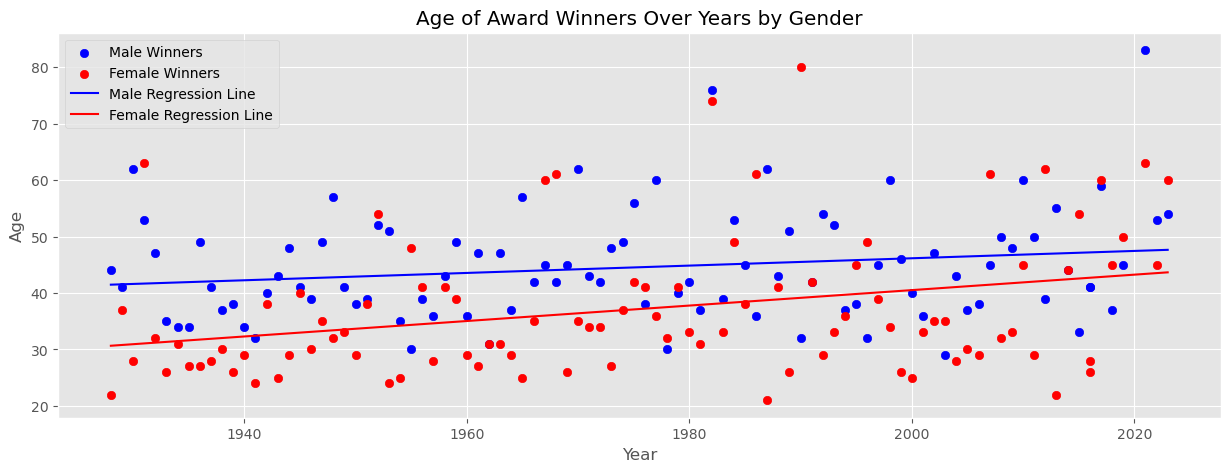

In [24]:
plt.scatter(df_male['year'], df_male['age'], color='blue', label='Male Winners')
plt.scatter(df_female['year'], df_female['age'], color='red', label='Female Winners')

# for males
coefficients_male = np.polyfit(df_male['year'], df_male['age'], 1)
m_male = coefficients_male[0]
b_male = coefficients_male[1]
regression_line_male = (m_male * df_male['year']) + b_male

# for females
coefficients_female = np.polyfit(df_female['year'], df_female['age'], 1)
m_female = coefficients_female[0]
b_female = coefficients_female[1]
regression_line_female = (m_female * df_female['year']) + b_female

plt.plot(df_male['year'], regression_line_male, color='blue', label='Male Regression Line')
plt.plot(df_female['year'], regression_line_female, color='red', label='Female Regression Line')

plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age of Award Winners Over Years by Gender')
plt.legend()

plt.show()

---

## Line chart

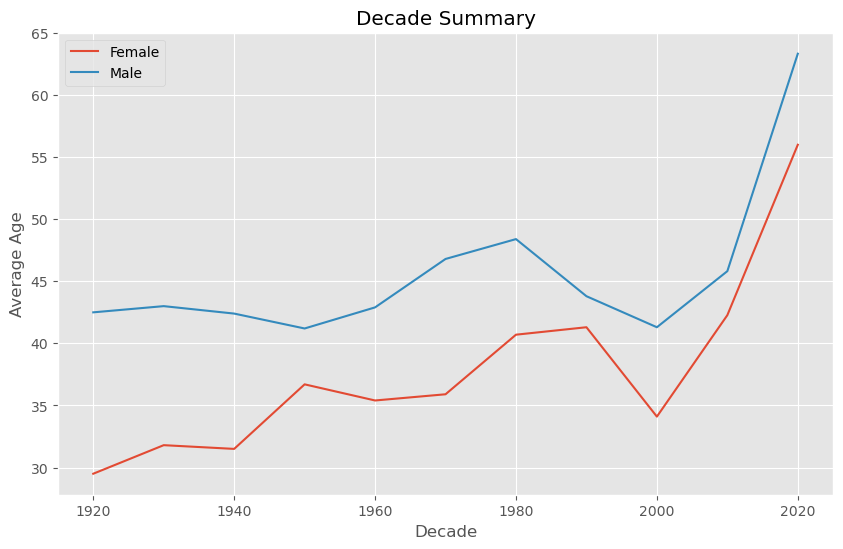

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(decade_summary[decade_summary['gender'] == 'F']['decade'], decade_summary[decade_summary['gender'] == 'F']['Average Age'], label='Female')
plt.plot(decade_summary[decade_summary['gender'] == 'M']['decade'], decade_summary[decade_summary['gender'] == 'M']['Average Age'], label='Male')
plt.xlabel('Decade')
plt.ylabel('Average Age')
plt.title('Decade Summary')
plt.legend()
plt.show()